In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Loading data

Load train, test and sample data and get info about the dataset

In [2]:
# Load data
train = pd.read_csv("data/train.csv")
train = train.drop("id", axis=1)
test = pd.read_csv("data/test.csv")
test = test.drop("id", axis=1)
sample = pd.read_csv("data/sample_submission.csv")

In [3]:
train.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [4]:
test.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [5]:
sample.head()

,id,Rings
0,90615,10
1,90616,10
2,90617,10
3,90618,10
4,90619,10


Check for missing data

In [6]:
train.isna().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Whole weight.1    False
Whole weight.2    False
Shell weight      False
Rings             False
dtype: bool

In [7]:
test.isna().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Whole weight.1    False
Whole weight.2    False
Shell weight      False
dtype: bool

No missing values found

# 2. Plotting data

Plot continuous data and feature distribution

## 2.1. Sex distribution

Set some global variables

In [8]:
# Set color scheme
sns.set_palette('Set3')
colors = sns.color_palette()
colors

[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (1.0, 0.9294117647058824, 0.43529411764705883)]

In [9]:
def sex_dist(df, name):
    keys = df["Sex"].value_counts().keys().tolist()
    values = df["Sex"].value_counts().tolist()
    sex = dict(zip(keys, values))
    fig, ax = plt.subplots()
    for i, x in enumerate(sex.items()):
        ax.bar(x[0], x[1], color=colors[i], edgecolor='black')
    ax.set(xlabel="Sex",
           ylabel="Count",
           title=f"Sex Distribution ({name} dataset)")
    ax.legend(keys)
    fig.savefig(f"images/s4e4/{name}-sex-distribution.png")

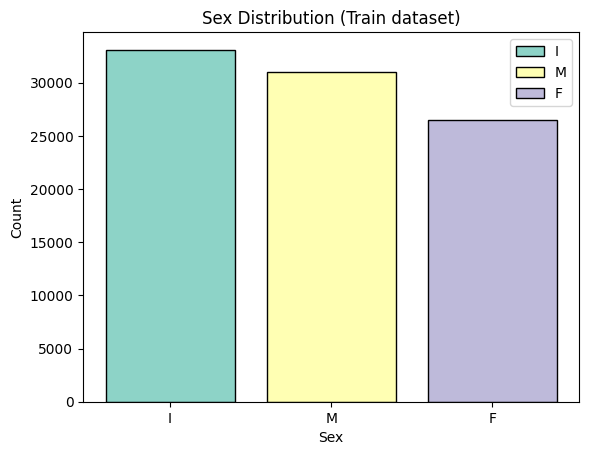

In [10]:
sex_dist(train, "Train")

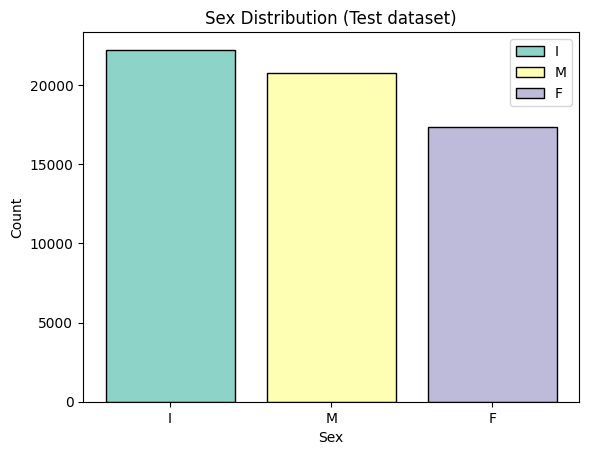

In [11]:
sex_dist(test, "Test")

## 2.2. Distribution of parameters

Draw a histogram of parameter distribution

#### 2.2.1. Train data distribution

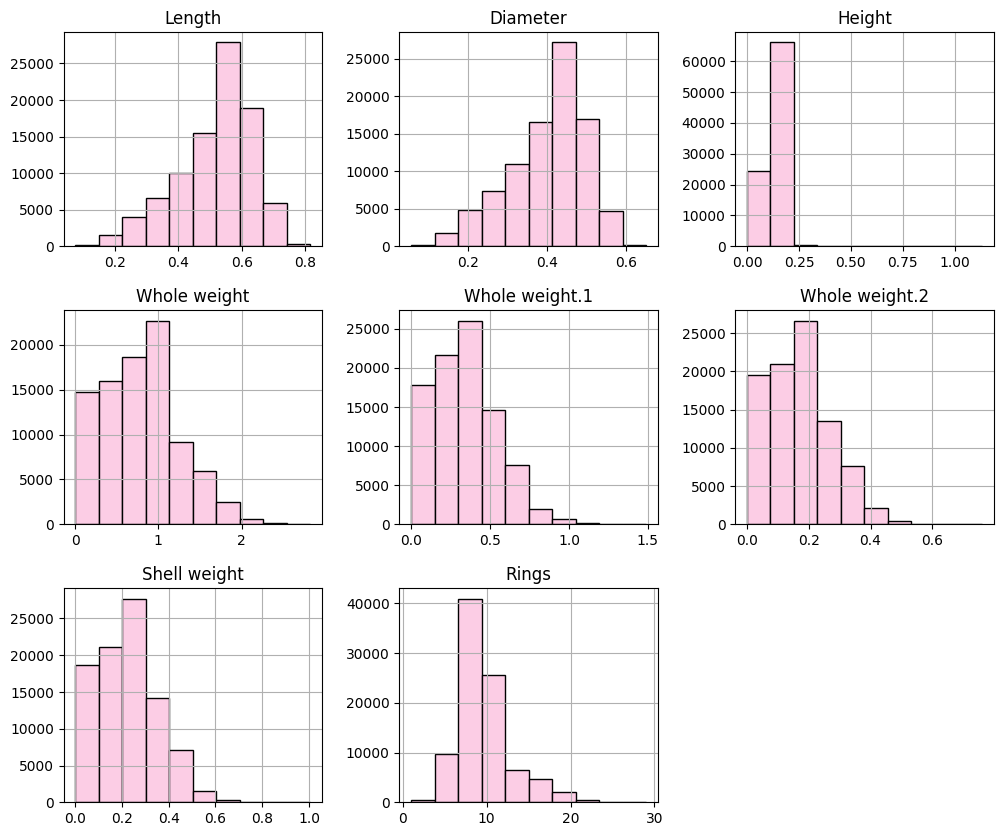

In [12]:
train.hist(figsize=(12, 10), color=colors[7], edgecolor='black');

#### 2.2.2. Test data distribution

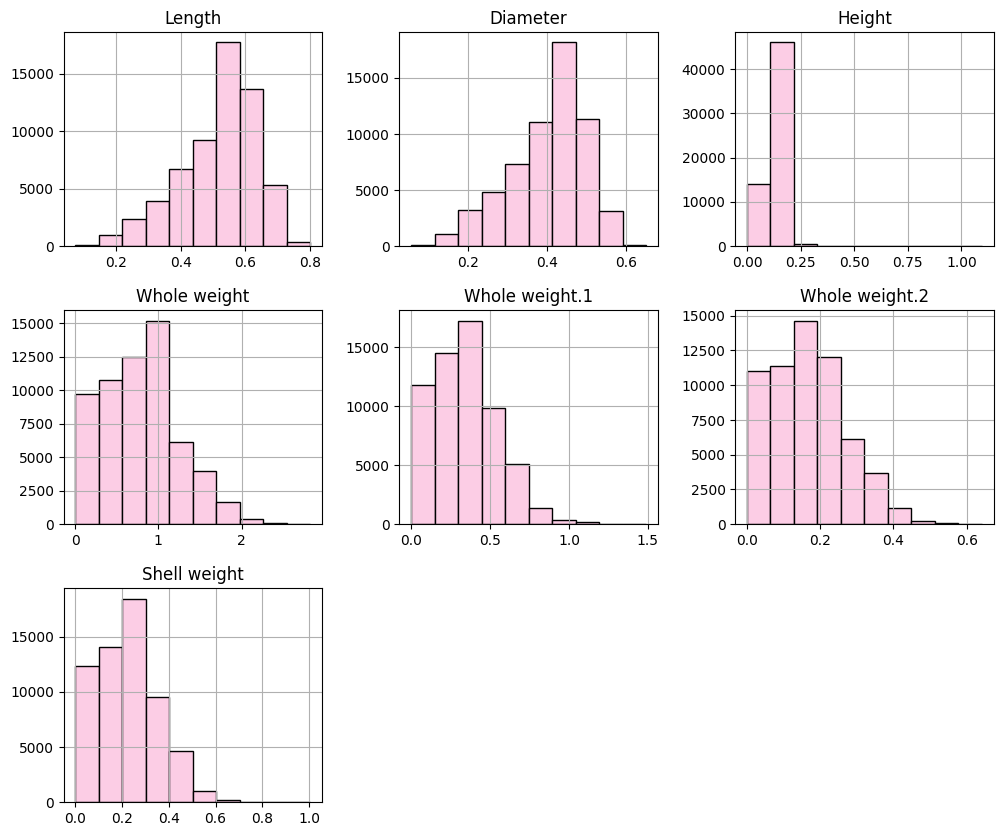

In [13]:
test.hist(figsize=(12, 10), color=colors[7], edgecolor='black');

### 2.3. Violin plot

#### 2.3.1 Train data violin plot

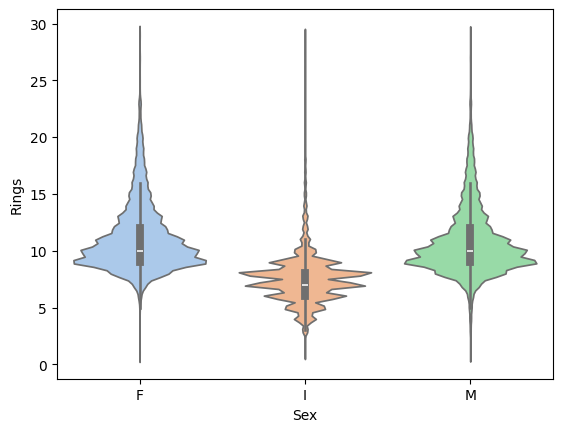

In [23]:
#sns.violinplot(x='Sex', y='Rings', data=train, palette='pastel');
sns.violinplot(x='Sex', y='Rings', data=train, palette='pastel', hue='Sex', legend=False);

# 3. Creating a model

Create a `Random Forest Regressor` model for predicting age of an abalone

## 3.1. Data preprocessing

Prepare a training set for model training

In [24]:
X = train.drop("Rings", axis=1)
y = train["Rings"]

In [25]:
X.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975


In [26]:
y.head()

0    11
1    11
2     6
3    10
4     9
Name: Rings, dtype: int64

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
def encode(df, enc):
    cat_features = ["Sex"]
    transformer  = ColumnTransformer([("one_hot",
                                        enc,
                                        cat_features)],
                                        remainder="passthrough")
    return pd.DataFrame(transformer.fit_transform(df))

In [28]:
transformed_X = encode(X, OneHotEncoder())
X = transformed_X

In [29]:
transformed_test = encode(test, OneHotEncoder())
test = transformed_test

In [30]:
X.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400
1,1.0,0.0,0.0,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200
2,0.0,1.0,0.0,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050
3,0.0,0.0,1.0,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500
4,0.0,1.0,0.0,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975


In [31]:
test.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,1.0,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,0.0,0.0,1.0,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,0.0,0.0,1.0,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,0.0,0.0,1.0,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,0.0,1.0,0.0,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [32]:
X.shape, y.shape

((90615, 10), (90615,))

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((72492, 10), (72492,), (18123, 10), (18123,))

## 3.2. Creating a model

* Instantiate various regression models from `sklearn` library
* Tune hyperparameters for selected models
* Fit the model
* Evaluate the model
* Use the model to make predictions on the test set
* Save results to a submission file

### 3.2.1 Random Forest Regressor

Create and test the `RandomForestRegressor` regression model

In [110]:
%%time
from sklearn.ensemble import RandomForestRegressor
# Instantiate Random Forest Regressor
#model = RandomForestRegressor()

CPU times: user 74.1 ms, sys: 19.8 ms, total: 94 ms
Wall time: 151 ms


Use `GridSearchCV` for finding best hyperparameters

In [59]:
from sklearn.model_selection import GridSearchCV

def grid_search(X, y, model):
    param_grid = {
        'bootstrap': [True],
        'max_depth': [80, 90, 100, 110],
        'max_features': [2, 3],
        'min_samples_leaf': [3, 4, 5],
        'min_samples_split': [8, 10, 12],
        'n_estimators': [100, 200, 300, 1000]
    }
    grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                               cv = 3, n_jobs = -1, verbose = 2)
    #grid_search.fit(X, y, model)

In [60]:
%%time
grid_search(X, y, model)

CPU times: user 26 µs, sys: 0 ns, total: 26 µs
Wall time: 30.5 µs


Fit the `RandomForestRegressor` model with found parameters

In [111]:
%%time
model = RandomForestRegressor(bootstrap=True,
                            n_estimators=1500,
                            n_jobs=-1,
                            min_samples_split=10,
                            min_samples_leaf=6,
                            max_features=3,
                            oob_score=True,
                            max_depth=100,
                            criterion='friedman_mse',
                            random_state=42)
model.fit(X_train, y_train)

CPU times: user 3min 14s, sys: 1.1 s, total: 3min 15s
Wall time: 40 s


RandomForestRegressor(criterion='friedman_mse', max_depth=100, max_features=3,
                      min_samples_leaf=6, min_samples_split=10,
                      n_estimators=1500, n_jobs=-1, oob_score=True,
                      random_state=42)

Evaluate `RandomForestRegressor` model using `root_mean_squared_log_error` method

In [112]:
%%time
from sklearn.metrics import root_mean_squared_log_error

y_preds = model.predict(X_test)
root_mean_squared_log_error(y_test, y_preds)

CPU times: user 6.18 s, sys: 63.7 ms, total: 6.24 s
Wall time: 986 ms


0.1499363893961752

Use created `RandomForestRegressor` model to predict values of the `Rings` column on the test set

In [113]:
%%time
predictions = model.predict(test)

CPU times: user 19.7 s, sys: 96.5 ms, total: 19.8 s
Wall time: 2.79 s


In [114]:
sample["Rings"] = predictions
#sample.to_csv('submission.csv', index=False)

In [115]:
sample.head()

,id,Rings
0,90615,9.894599
1,90616,9.904085
2,90617,9.855029
3,90618,10.596559
4,90619,7.685242


In [116]:
pickle.dump(model, open('models/model_RFR.pkl', 'wb'))

### 3.2.2. XGBoost

Use `XGBoost` as a regression model

In [101]:
xgb_params = {
    'n_estimators' : 100000,
    'max_depth': 9,
    'max_bin': 461,
    'subsample': 0.8670561876025071,
    'alpha': 0.5241810316500617,
    'gamma': 0.00496109442006053,
    'lambda': 7.078493302377542e-07,
    'min_child_weight': 2.5614435070408734,
    'learning_rate': 0.001632097029810397,
    'colsample_bytree': 0.5467512442909263,
    'colsample_bylevel': 0.903483301595809,
    'colsample_bynode': 0.5754876788766643,
    'grow_policy': 'depthwise',
    'objective': 'reg:squarederror',
    "tree_method" : "gpu_hist",
    "early_stopping_rounds" : 2000,
    "random_state" : 42,
    "eval_metric": "rmsle",
    "verbosity" :  0,
}

In [102]:
from xgboost import XGBRegressor
from xgboost.callback import EarlyStopping
model = XGBRegressor(**xgb_params) # Instantiate a model

In [103]:
model.fit(X_train, y_train, eval_set=[(X_test,y_test)],verbose=0,callbacks=[EarlyStopping(rounds = 2500,save_best=True)])

/home/kostas/Documents/git/Python_Venv/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(alpha=0.5241810316500617, base_score=None, booster=None,
             callbacks=None, colsample_bylevel=0.903483301595809,
             colsample_bynode=0.5754876788766643,
             colsample_bytree=0.5467512442909263, device=None,
             early_stopping_rounds=2000, enable_categorical=False,
             eval_metric='rmsle', feature_types=None, gamma=0.00496109442006053,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints=None, lambda=7.078493302377542e-07,
             learning_rate=0.001632097029810397, max_bin=461,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=2.5614435070408734, missing=nan,
             monotone_constraints=None, multi_strategy=None,
             n_estimators=100000, n_jobs=None, ...)

In [104]:
%%time
predictions = model.predict(test)

CPU times: user 1.28 s, sys: 23.2 ms, total: 1.3 s
Wall time: 1.08 s


In [108]:
sample["Rings"] = predictions
sample.to_csv('submission.csv', index=False)

In [96]:
sample.head()

,id,Rings
0,90615,9.675432
1,90616,9.668249
2,90617,9.904821
3,90618,10.203520
4,90619,7.664273


In [97]:
model.best_score

0.14879921791916959

In [109]:
pickle.dump(model, open('models/model_XGB.pkl', 'wb'))

In [100]:
!ls

data	LICENSE    README.md	     s4e4.ipynb
images	model.pkl  requirements.txt  submission.csv
